In [45]:
from pymarketng.application.Mechanism import *
from pymarketng.application.BidManager import BidManager
from pymarketng.application.Plot import plot_demand_curves, plot_trades_as_graph

from pymarketng.domain.Bid import Bid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


In [46]:
# 1 Round of auction dataframe
n = 4
data = {
    "user": np.random.randint(1, 21, n),
    "type": np.random.randint(1, 4, n),
    "unit": np.random.randint(1, 100, n),
    "price": np.random.randint(0, 200, n),
    "buying": np.random.choice([True, False], n) ,
    "time": sorted([
        datetime.datetime(
            2022,
            np.random.randint(1, 13),
            np.random.randint(1, 28),
            np.random.randint(0, 24),
            np.random.randint(0, 60),
            np.random.randint(0, 60),
        )
        for _ in range(n)
    ]),
}
df = pd.DataFrame(data)
df

,user,type,unit,price,buying,time
0,13,2,62,14,False,2022-01-16 11:09:30
1,20,2,69,135,True,2022-03-22 01:47:31
2,7,1,65,146,True,2022-05-23 08:24:16
3,7,2,11,85,False,2022-12-05 23:59:15


In [47]:
bm = BidManager()

# create bids from df
for index, row in df.iterrows():
    bm.add_bid(Bid(row["price"],row["user"],row["unit"],row["buying"],row["time"]))

bm.get_df()

,user,buying,price,quantity,remaining_quantity,time,divisible
0,20,True,135,69,69,2022-03-22 01:47:31,True
1,7,True,146,65,65,2022-05-23 08:24:16,True
2,13,False,14,62,62,2022-01-16 11:09:30,True
3,7,False,85,11,11,2022-12-05 23:59:15,True


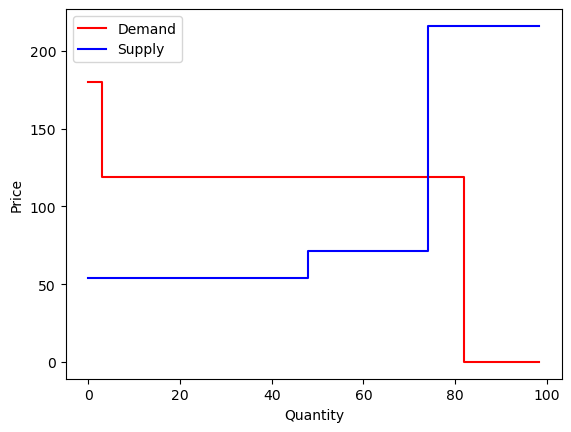

In [40]:
bm.plot()

In [41]:
bm_new,tm=bm.run(Average_Mechanism_Multi)
bm.um.get_df()

1
1
1


,name,id,total_bid,total_quantity,bids,transactions,profit_per_unit,total_profit,participations,score
0,,7,2592.0,48.0,[48 * 54],[],0.0,0.0,0,0
1,,18,1846.0,26.0,[26 * 71],[],0.0,0.0,0,0
2,,17,-9401.0,-79.0,[79 * 119],[],0.0,0.0,0,0


In [42]:
tm.get_df()

,mechanism.buy_price,mechanism.sell_price,mechanism.quantity,buyer.id,buyer.price,buyer.quantity,buyer.remaining_quantity,seller.id,seller.price,seller.quantity,seller.remaining_quantity
0,95.0,95.0,3,7,180,3,0,7,54,48,0
1,95.0,95.0,45,17,119,79,8,7,54,48,0
2,95.0,95.0,26,17,119,79,8,18,71,26,0


In [43]:
bm_new.get_df()

,user,buying,price,quantity,remaining_quantity,time,divisible
0,17,True,119,79,8,2022-09-10 12:34:11,True


In [44]:
bm_new.um.get_df()

,name,id,total_bid,total_quantity,bids,transactions,profit_per_unit,total_profit,participations,score
0,,7,2592.0,48.0,[48 * 54],"[(7, 95.0)<(3)>(7, 95.0), (17, 95.0)<(45)>(7, ...",82.0,1968.0,0,0
1,,18,1846.0,26.0,[26 * 71],"[(17, 95.0)<(26)>(18, 95.0)]",24.0,624.0,1,0
2,,17,-9401.0,-79.0,[79 * 119],"[(17, 95.0)<(45)>(7, 95.0), (17, 95.0)<(26)>(1...",48.0,1704.0,1,0
